In [3]:
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
# !python -m spacy download en_core_web_lg

Requirement already up-to-date: spacy in /home/rakesh/anaconda3/lib/python3.8/site-packages (2.3.5)
Requirement already up-to-date: spacy-lookups-data in /home/rakesh/anaconda3/lib/python3.8/site-packages (0.3.2)
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
df = pd.read_csv('twitter16m.csv', encoding='latin1', header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df = df[[5, 0]]

In [6]:
df.columns = ['twitts', 'sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [7]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [8]:
sent_map = {0:'negative', 4:'positive'}

### Word Count

In [9]:
df['word_counts'] = df.twitts.apply(lambda x: len(str(x).split()))

In [10]:
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### Character Count

In [11]:
df['char_counts'] = df.twitts.apply(lambda x: len(x))
df.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Average word length

In [12]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
#     print(word_len)
    return word_len/len(word) # = len(X)/len(words)

In [13]:
df['avg_word_len'] = df.twitts.apply(lambda x: get_avg_word_len(x))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,48.000000
1,is upset that he can't update his Facebook by ...,0,21,111,18.000000
2,@Kenichan I dived many times for the ball. Man...,0,18,89,11.833333
3,my whole body feels itchy and like its on fire,0,10,47,9.250000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,15.000000


### Stop words Count

In [14]:
print(STOP_WORDS)

{'eleven', 'keep', 'own', 'three', 'under', 'through', 'becoming', 'at', 'wherever', 'upon', 'even', 'well', 'somehow', 'in', "'re", 'ever', '’d', 'was', 'and', 'everywhere', 'their', 'afterwards', 'only', 'whose', 'four', 'give', 'thus', 'fifty', 'six', 'unless', 'please', 'without', 'thru', 'now', 'about', 'several', 'sometime', 'or', 'together', 'enough', '‘ve', 'whereas', 'has', 'per', 'yours', 'hence', 'latterly', 'move', 'next', 'whether', 'ours', 'one', 'seem', 'who', 'here', '‘ll', 'have', 'no', 'can', "n't", 'namely', 'front', 'which', '’ll', 'five', 'how', 'nevertheless', 'regarding', 'everyone', '’ve', 'might', 'often', 'whereupon', 'neither', 'last', 'itself', 'above', 'herein', 'either', 'below', "'m", 'cannot', 'you', 'empty', 'seems', 'being', 'twenty', 'amount', 'should', 'used', 'call', 'fifteen', 'behind', 'whoever', 'none', 'what', 'anyone', 'nine', 'sometimes', 'this', 'there', "'ll", 'get', 'see', 'during', 'hereupon', 'toward', 'also', 'besides', 'almost', '‘d', '

When you are trying to unerstand context and semantic meaning of sentence then you need not to remove stopwords. You should remove stop words according to need.

In [15]:
df['stop_words_len'] = df.twitts.apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,48.000000,4
1,is upset that he can't update his Facebook by ...,0,21,111,18.000000,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,11.833333,7
3,my whole body feels itchy and like its on fire,0,10,47,9.250000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,15.000000,10


### Count #HashTags and @Mentions 

In [16]:
#example
x = 'This is #HashTags and this is @Mentions'
# x= x.split()
# x

In [17]:
[t for t in x.split() if t.startswith('@')]

['@Mentions']

In [18]:
df['hashtags_count'] = df.twitts.apply(lambda x:len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df.twitts.apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [19]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,48.000000,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,18.000000,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,11.833333,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,9.250000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,15.000000,10,0,1


### if numeric digits are present in twitts

In [20]:
df['numerics_count'] = df.twitts.apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [21]:
df.tail()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
1599995,Just woke up. Having no school is the best fee...,4,11,56,11.250000,4,0,0,0
1599996,TheWDB.com - Very cool to hear old Walt interv...,4,11,78,3.190476,1,0,0,0
1599997,Are you ready for your MoJo Makeover? Ask me f...,4,11,57,6.571429,5,0,0,0
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4,12,65,8.833333,3,0,0,0
1599999,happy #charitytuesday @theNSPCC @SparksCharity...,4,5,62,4.071429,0,1,3,0


### Upper case words count

In [22]:
df['upper_counts'] = df.twitts.apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [23]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,48.000000,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,18.000000,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,11.833333,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,9.250000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,15.000000,10,0,1,0,1


## Preprocessing and Cleaning

### Lower case conversion

In [24]:
df.twitts = df.twitts.apply(lambda x: x.lower())

In [25]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,48.0,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,18.0,9,0,0,0,0


### Contration to Expansion

In [26]:
!pip install contractions

In [27]:
#Contraction Example
x = "i don't know what you want, can't, he'll, i'd"

In [28]:
contractions.fix(x)

'i do not know what you want, can not, he will, I would'

In [29]:
%%time
df.twitts = df.twitts.apply(lambda x: contractions.fix(x))

CPU times: user 16.1 s, sys: 67.6 ms, total: 16.2 s
Wall time: 16.2 s


In [30]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,48.000000,4,0,1,0,1
1,is upset that he can not update his facebook b...,0,21,111,18.000000,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,11.833333,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,9.250000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,15.000000,10,0,1,0,1


### Count and Remove Emails

In [31]:
import re

In [32]:
x = 'hi, my mail id is rakesh.panigrahy123@gmail.com and lucky_panigrahy@gmail.com'

In [33]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9]+)', x)

['rakesh.panigrahy123@gmail.com', 'lucky_panigrahy@gmail.com']

In [34]:
df['emails'] = df.twitts.apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9]+)', x))

In [35]:
df['emails_count'] = df.emails.apply(lambda x: len(x))

In [36]:
df[df.emails_count > 0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,3.772727,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,1.421053,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kind of sad lol ad...,0,8,76,2.615385,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,16.285714,7,0,1,1,0,[press@linkedin.com],1


In [37]:
x

'hi, my mail id is rakesh.panigrahy123@gmail.com and lucky_panigrahy@gmail.com'

In [38]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9]+)', '', x)

'hi, my mail id is  and '

In [39]:
df['twitts'] = df.twitts.apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9]+)', '', x))

In [40]:
df[df.emails_count > 0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,3.772727,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,1.421053,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kind of sad lol ad...,0,8,76,2.615385,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,16.285714,7,0,1,1,0,[press@linkedin.com],1


### Count URLs and remove

In [41]:
x = 'hi, to watch more visit https://youtube.com/kgptalkies and https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php?passed=passed'
regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [42]:
re.findall(regex,x)

['https://youtube.com/kgptalkies',
 'https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php?passed=passed']

In [43]:
df['urls_flag'] = df.twitts.apply(lambda x: re.findall(regex,x))

In [44]:
re.sub(regex, '', x)

'hi, to watch more visit  and '

In [45]:
df['twitts'] = df.twitts.apply(lambda x: re.sub(regex, '', x))

In [46]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,48.000000,4,0,1,0,1,[],0,[http://twitpic.com/2y1zl]
1,is upset that he can not update his facebook b...,0,21,111,18.000000,9,0,0,0,0,[],0,[]
2,@kenichan i dived many times for the ball. man...,0,18,89,11.833333,7,0,1,0,1,[],0,[]
3,my whole body feels itchy and like its on fire,0,10,47,9.250000,5,0,0,0,0,[],0,[]
4,"@nationwideclass no, it is not behaving at all...",0,21,111,15.000000,10,0,1,0,1,[],0,[]


### Remove RT(retwitts)

In [47]:
df['twitts'] = df.twitts.apply(lambda x: re.sub('RT', '', x))

### Special character removal or punctuaion removal

In [48]:
df['twitts'] = df.twitts.apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [49]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,48.000000,4,0,1,0,1,[],0,[http://twitpic.com/2y1zl]
1,is upset that he can not update his facebook b...,0,21,111,18.000000,9,0,0,0,0,[],0,[]
2,kenichan i dived many times for the ball manag...,0,18,89,11.833333,7,0,1,0,1,[],0,[]
3,my whole body feels itchy and like its on fire,0,10,47,9.250000,5,0,0,0,0,[],0,[]
4,nationwideclass no it is not behaving at all I...,0,21,111,15.000000,10,0,1,0,1,[],0,[]


### Remove multiple spaces "hi                     there       "

In [50]:
x = 'this    is one of the  best         tutorials'

In [51]:
" ".join(x.split())

'this is one of the best tutorials'

In [52]:
df['twitts'] = df.twitts.apply(lambda x: " ".join(x.split()))

In [53]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,48.000000,4,0,1,0,1,[],0,[http://twitpic.com/2y1zl]
1,is upset that he can not update his facebook b...,0,21,111,18.000000,9,0,0,0,0,[],0,[]
2,kenichan i dived many times for the ball manag...,0,18,89,11.833333,7,0,1,0,1,[],0,[]
3,my whole body feels itchy and like its on fire,0,10,47,9.250000,5,0,0,0,0,[],0,[]
4,nationwideclass no it is not behaving at all I...,0,21,111,15.000000,10,0,1,0,1,[],0,[]


### Remove HTML tags

In [54]:
from bs4 import BeautifulSoup

In [55]:
x = '<html><h2>Thanky you, all</h2></html>'

In [56]:
BeautifulSoup(x, 'lxml').get_text()

'Thanky you, all'

In [57]:
%%time
df['twitts'] = df.twitts.apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

CPU times: user 6min 51s, sys: 24.3 s, total: 7min 15s
Wall time: 8min 7s


### Remove Accented Chars

In [58]:
import unicodedata

In [59]:
x = 'fiancé, résumé, El Niño, déjà vu.'

In [60]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [61]:
remove_accented_chars(x)

'fiance, resume, El Nino, deja vu.'

### Spacy and NLP

### Remove Stopwords

In [62]:
x = 'this is a stop words removal code'

In [63]:
' '.join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [64]:
df['twitts'] = df.twitts.apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))

In [65]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,48.000000,4,0,1,0,1,[],0,[http://twitpic.com/2y1zl]
1,upset update facebook texting cry result schoo...,0,21,111,18.000000,9,0,0,0,0,[],0,[]
2,kenichan dived times ball managed save 50 rest...,0,18,89,11.833333,7,0,1,0,1,[],0,[]
3,body feels itchy like fire,0,10,47,9.250000,5,0,0,0,0,[],0,[]
4,nationwideclass behaving I mad,0,21,111,15.000000,10,0,1,0,1,[],0,[]


### Convert into base or root form of word

In [66]:
nlp = spacy.load('en_core_web_sm')

In [67]:
x = 'kenichan dived times ball managed save 50 rest bounds'

In [68]:
# x = 'i you he she they is am are'

In [69]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(' '.join(x_list))

In [70]:
make_to_base(x)

kenichan dive times ball manage save 50 rest bound


In [71]:
### Can apply on whole dataset by using lambda function, we are not doing as it will take lots of time

### Common words removal 

In [72]:
text = ' '.join(df['twitts'])

In [73]:
text = text.split()

In [74]:
freq_comm = pd.Series(text).value_counts()

In [75]:
freq_comm

I                234107
good              89366
going             87981
day               82299
like              77735
                  ...  
tramp-of-line         1
damptjims             1
mbrockk               1
leanns                1
astonejackson         1
Length: 790989, dtype: int64

In [76]:
f20 = freq_comm[:20]

In [77]:
f20

I         234107
good       89366
going      87981
day        82299
like       77735
got        69684
-          69661
love       65631
today      64512
work       62804
want       58544
time       56081
lol        55087
know       51172
new        41995
think      41040
night      41029
amp        40618
thanks     39311
home       39169
dtype: int64

In [78]:
df['twitts'] = df.twitts.apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

### Rare words removal

In [79]:
rare20 = freq_comm[-20:]

In [80]:
rare20

stuartheron        1
reidaboutozzie     1
pinochio           1
laterwhoop         1
mondaybeginning    1
gratulace          1
jackbooyeah        1
quotsalemquot      1
fashionbug         1
screwedquot        1
pweeeeeezei        1
monkeyminion       1
rrv85              1
beforenow          1
travoltarol        1
tramp-of-line      1
damptjims          1
mbrockk            1
leanns             1
astonejackson      1
dtype: int64

In [81]:
rare = freq_comm[freq_comm.values == 1]

In [82]:
rare

nounou           1
sculpty          1
heynathan        1
itashole         1
planetparker     1
                ..
tramp-of-line    1
damptjims        1
mbrockk          1
leanns           1
astonejackson    1
Length: 539576, dtype: int64

In [83]:
df['twitts'] = df.twitts.apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [84]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,48.000000,4,0,1,0,1,[],0,[http://twitpic.com/2y1zl]
1,upset update facebook texting cry result schoo...,0,21,111,18.000000,9,0,0,0,0,[],0,[]
2,kenichan dived times ball managed save 50 rest...,0,18,89,11.833333,7,0,1,0,1,[],0,[]
3,body feels itchy fire,0,10,47,9.250000,5,0,0,0,0,[],0,[]
4,nationwideclass behaving mad,0,21,111,15.000000,10,0,1,0,1,[],0,[]


### Word Cloud Visualization

In [85]:
!pip install wordcloud

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
x = ' '.join(text[:40000]) #Using 40000 data to avoid slow down of computer

In [88]:
x

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving I mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol I fine thanks tatianak nope twittera que muera spring break plain city snowing re-pierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh I wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut I time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley I sad misslilly ooooh lol leslie ok leslie mad meh lover exception trac

In [89]:
wc = WordCloud(width=1000, height=500).generate(x)

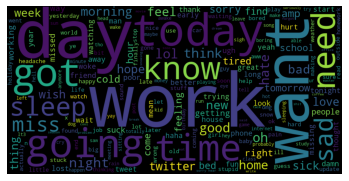

In [90]:
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling Correction

In [91]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in /home/rakesh/anaconda3/lib/python3.8/site-packages (0.15.3)
[nltk_data] Downloading package brown to /home/rakesh/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/rakesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rakesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rakesh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /home/rakesh/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/rakesh/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [92]:
from textblob import TextBlob

In [93]:
x = 'tanks forr watchingg thes vidio'

In [94]:
x = TextBlob(x).correct()

In [95]:
#it indicates it is not correct in every situation
x

TextBlob("tanks for watching the video")

### Tokenization

In [96]:
x = 'Thanks for watching this video. Please like it.'

In [97]:
TextBlob(x).words

WordList(['Thanks', 'for', 'watching', 'this', 'video', 'Please', 'like', 'it'])

In [98]:
doc = nlp(x)

In [99]:
for token in doc:
    print(token)

Thanks
for
watching
this
video
.
Please
like
it
.


### Lemmatization

In [100]:
x = 'runs run running ran'

In [101]:
from textblob import Word

In [102]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [103]:
# Using Spacy
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


### Detect Entities using NER of Spacy

In [104]:
x = 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [105]:
doc =  nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [106]:
from spacy import displacy

In [107]:
displacy.render(doc, style='ent')

### Detecting Nouns

In [108]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [109]:
for noun in doc.noun_chunks:
    print(noun)

Breaking
News
Donald Trump
the president
the USA
a deal
the moon


### Translation and language detection

In [110]:
tb = TextBlob(x)

In [111]:
tb.detect_language()

'en'

In [112]:
tb.translate(to = 'hi')

TextBlob("ब्रेकिंग न्यूज़: डोनाल्ड ट्रम्प, संयुक्त राज्य अमेरिका के राष्ट्रपति चांद को खदान करने के लिए एक समझौते पर हस्ताक्षर करना चाहते हैं")

### Use inbuild sentiment classifier

In [113]:
from textblob.sentiments import NaiveBayesAnalyzer

In [114]:
x = 'We all stand together to fight with corona virus. We will win together'
# x = 'We all are suffering from corona virus'

In [115]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [116]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.782819573725504, p_neg=0.21718042627449635)

## Advanced text processing

### N-Grams

In [117]:
x = 'thanks for watching'

In [118]:
tb = TextBlob(x)

In [119]:
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

### Bag of Words BoW

In [120]:
x = ['this is first sentence', 'this is second', 'this is last this']

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
cv = CountVectorizer(ngram_range=(1,1))

In [123]:
text_counts = cv.fit_transform(x)

In [124]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [125]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 2]])

In [126]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [127]:
bow = pd.DataFrame(text_counts.toarray(), columns= cv.get_feature_names())

In [128]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,2


### Term Frequency

Term frequency is simply the ration of the count of a words present in sentence, to the length of the sentence.

In [129]:
x

['this is first sentence', 'this is second', 'this is last this']

In [130]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,2


In [131]:
bow.shape

(3, 6)

In [132]:
tf = bow.copy()

In [133]:
for index, row in enumerate(bow.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [134]:
tf

,first,is,last,second,sentence,this
0,0.25,0.250000,0.00,0.000000,0.25,0.250000
1,0.00,0.333333,0.00,0.333333,0.00,0.333333
2,0.00,0.250000,0.25,0.000000,0.00,0.500000


### Inverse Document Frequency

idf = log((1+N)/(n+1)) + 1 used in sklearn when smooth_idf = True

where, N is the total number of rows and n is the number of rows in which the word was present.

In [135]:
x_df = pd.DataFrame(x, columns=['words'])

In [136]:
x_df

,words
0,this is first sentence
1,this is second
2,this is last this


In [137]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,2


In [138]:
N = bow.shape[0]
N

3

In [139]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [140]:
bb['first'].sum()

1

In [141]:
bb['this'].sum()

3

In [142]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [143]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [144]:
nz

[1, 3, 1, 1, 1, 3]

In [145]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1))+1)

In [146]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### TF-IDF

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [148]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [149]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.35653519, 0.60366655, 0.        , 0.        ,
        0.71307037]])

In [150]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

### Word Embeddings

#### Spacy Word2Vec

In [151]:
nlp = spacy.load('en_core_web_md')#You can take lg library for better embedding

In [152]:
doc = nlp('thank you! dog cat lion jnhuduy')

In [153]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
jnhuduy False


In [154]:
token.vector.shape

(300,)

In [155]:
token

jnhuduy

In [156]:
nlp('cat').vector

array([-0.15067  , -0.024468 , -0.23368  , -0.23378  , -0.18382  ,
        0.32711  , -0.22084  , -0.28777  ,  0.12759  ,  1.1656   ,
       -0.64163  , -0.098455 , -0.62397  ,  0.010431 , -0.25653  ,
        0.31799  ,  0.037779 ,  1.1904   , -0.17714  , -0.2595   ,
       -0.31461  ,  0.038825 , -0.15713  , -0.13484  ,  0.36936  ,
       -0.30562  , -0.40619  , -0.38965  ,  0.3686   ,  0.013963 ,
       -0.6895   ,  0.004066 , -0.1367   ,  0.32564  ,  0.24688  ,
       -0.14011  ,  0.53889  , -0.80441  , -0.1777   , -0.12922  ,
        0.16303  ,  0.14917  , -0.068429 , -0.33922  ,  0.18495  ,
       -0.082544 , -0.46892  ,  0.39581  , -0.13742  , -0.35132  ,
        0.22223  , -0.144    , -0.048287 ,  0.3379   , -0.31916  ,
        0.20526  ,  0.098624 , -0.23877  ,  0.045338 ,  0.43941  ,
        0.030385 , -0.013821 , -0.093273 , -0.18178  ,  0.19438  ,
       -0.3782   ,  0.70144  ,  0.16236  ,  0.0059111,  0.024898 ,
       -0.13613  , -0.11425  , -0.31598  , -0.14209  ,  0.0281

In [157]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.5647585
thank ! 0.52147406
thank dog 0.2504265
thank cat 0.20648488
thank lion 0.13629763
thank jnhuduy 0.0

you thank 0.5647585
you you 1.0
you ! 0.4390223
you dog 0.36494097
you cat 0.30807978
you lion 0.20392051
you jnhuduy 0.0

! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852203
! cat 0.29702348
! lion 0.19601385
! jnhuduy 0.0

dog thank 0.2504265
dog you 0.36494097
dog ! 0.29852203
dog dog 1.0
dog cat 0.8016855
dog lion 0.47424486
dog jnhuduy 0.0

cat thank 0.20648488
cat you 0.30807978
cat ! 0.29702348
cat dog 0.8016855
cat cat 1.0
cat lion 0.5265437
cat jnhuduy 0.0

lion thank 0.13629763
lion you 0.20392051
lion ! 0.19601385
lion dog 0.47424486
lion cat 0.5265437
lion lion 1.0
lion jnhuduy 0.0

jnhuduy thank 0.0
jnhuduy you 0.0
jnhuduy ! 0.0
jnhuduy dog 0.0
jnhuduy cat 0.0
jnhuduy lion 0.0
jnhuduy jnhuduy 1.0



<ipython-input-157-ca330b4894ab>:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token1.text, token2.text, token1.similarity(token2))


## Machine Learning Models for text classification

### BoW

In [158]:
df.shape

(1600000, 13)

In [159]:
df0 = df[df['sentiment'] == 0].sample(2000)
df4 = df[df['sentiment'] == 4].sample(2000)

In [160]:
dfr = df0.append(df4)

In [161]:
dfr.shape

(4000, 13)

In [162]:
dfr_feat = dfr.drop(labels=['twitts', 'sentiment', 'emails'], axis=1)

In [163]:
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
376470,4,39,3.888889,1,0,1,0,0,0,[]
307135,3,14,2.200000,1,0,0,0,0,0,[]
103014,2,20,4.500000,0,0,0,0,0,0,[]
401939,12,66,13.250000,4,0,1,0,1,0,[]
85965,26,134,54.000000,7,0,1,0,3,0,[]
...,...,...,...,...,...,...,...,...,...,...
941071,24,127,51.500000,9,0,1,0,1,0,[]
1358237,13,64,17.000000,7,0,1,0,0,0,[]
1190692,7,34,3.000000,0,0,0,0,7,0,[]
1000003,4,23,6.000000,1,0,1,0,1,0,[]


In [164]:
y = dfr['sentiment']

In [165]:
from sklearn.feature_extraction.text import CountVectorizer

In [166]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])

In [167]:
text_counts.toarray().shape

(4000, 9758)

In [168]:
dfr_bog = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [169]:
dfr_bog.head(2)

,0055,007wifey,02,03,07,09,0922,095,0ladyb0,10,...,zomgponies,zone,zoo,zoom,zoomalbumdm,ztzg,zuckerzeugsquot,zuppalizzle,zz,zzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ML Algorithm

In [170]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [171]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgr_cv = LogisticRegressionCV(random_state=42, max_iter=1000, cv=2)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators = 200)

In [172]:
clf = {'SGD':sgd, 'LGR':lgr, 'LGR-CV':lgr_cv, 'SVM':svm, 'RFC':rfc}

In [173]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, ' -------------> ', ac)

In [174]:
%%time
classify(dfr_bog, y)

SGD  ------------->  0.63875
LGR  ------------->  0.65875
LGR-CV  ------------->  0.665
SVM  ------------->  0.64
RFC  ------------->  0.66375
CPU times: user 3min 34s, sys: 1.62 s, total: 3min 35s
Wall time: 1min 9s


### TFIDF

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [176]:
dfr.shape

(4000, 13)

In [177]:
dfr.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
376470,ladymaryann abominable,0,4,39,3.888889,1,0,1,0,0,[],0,[]
307135,bored,0,3,14,2.200000,1,0,0,0,0,[],0,[]
103014,homeworkand exam,0,2,20,4.500000,0,0,0,0,0,[],0,[]
401939,jessegoins glad hour,0,12,66,13.250000,4,0,1,0,1,[],0,[]
85965,tommcfly hi tom miss spoke portuguese google t...,0,26,134,54.000000,7,0,1,0,3,[],0,[]


In [178]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['twitts'])

In [179]:
X

<4000x9758 sparse matrix of type '<class 'numpy.float64'>'
	with 23066 stored elements in Compressed Sparse Row format>

In [180]:
%%time
classify(pd.DataFrame(X.toarray()), y)

SGD  ------------->  0.6425
LGR  ------------->  0.69375
LGR-CV  ------------->  0.70125
SVM  ------------->  0.65625
RFC  ------------->  0.645
CPU times: user 3min 33s, sys: 1.01 s, total: 3min 34s
Wall time: 1min 8s


### Word2Vec

In [181]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [182]:
%%time
dfr['vector'] = dfr.twitts.apply(lambda x:get_vec(x))

CPU times: user 38 s, sys: 14.9 ms, total: 38.1 s
Wall time: 38.1 s


In [185]:
X = np.concatenate(dfr['vector'].to_numpy(), axis=0)

In [187]:
X.shape

(4000, 300)

In [188]:
classify(pd.DataFrame(X), y)

SGD  ------------->  0.6425


/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR  ------------->  0.695
LGR-CV  ------------->  0.7


/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM  ------------->  0.6975
RFC  ------------->  0.66875


In [189]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, '----->', y_pred)

In [191]:
predict_w2v('hi, thanks for watching this video. Plese like this')

SGD -----> [0]
LGR -----> [0]
LGR-CV -----> [0]
SVM -----> [0]
RFC -----> [4]


In [194]:
predict_w2v('bad')

SGD -----> [0]
LGR -----> [0]
LGR-CV -----> [0]
SVM -----> [0]
RFC -----> [4]
